# Auto Sales Data Set

##### This Data contains  Sales data of an Automobile companies as uptained by Kaggle.com for public consumption.
<-- https://www.kaggle.com/datasets/ddosad/auto-sales-data/data -->


In [214]:
'''
ORDERNUMBER	- unique identification number assigned to each order.
QUANTITYORDERED	- number of items ordered in each order.
PRICEEACH - price of each item in the order.
ORDERLINENUMBER	- line number of each item within an order.
SALES - total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.
ORDERDATEIt - denotes the date on which the order was placed.
DAYS_SINCE_LASTORDER - number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.
STATUS - status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."
PRODUCTLINE	- This column specifies the product line categories to which each item belongs.
MSRP - Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.
PRODUCTCODE	- This column represents the unique code assigned to each product.
CITY - city where the customer is located.
POSTALCODE - ZIP code associated with the customer's address.
COUNTRY	-  where the customer is located.
DEALSIZE - size of the deal or order, which are the categories "Small," "Medium," or "Large.

non-anonymized columsn to be removed on later steps:
CUSTOMERNAME - It denotes the name of the customer who placed the order.
PHONE - contact phone number for the customer.
ADDRESSLINE1 - customer's address.
CONTACTLASTNAME	- contact person associated with the customer.
CONTACTFIRSTNAME - first name of the contact person associated with the customer.
'''

'\nORDERNUMBER\t- unique identification number assigned to each order.\nQUANTITYORDERED\t- number of items ordered in each order.\nPRICEEACH - price of each item in the order.\nORDERLINENUMBER\t- line number of each item within an order.\nSALES - total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.\nORDERDATEIt - denotes the date on which the order was placed.\nDAYS_SINCE_LASTORDER - number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.\nSTATUS - status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."\nPRODUCTLINE\t- This column specifies the product line categories to which each item belongs.\nMSRP - Manufacturer\'s Suggested Retail Price and represents the suggested selling price for each item.\nPRODUCTCODE\t- This column represents the unique code assigned to each product.\nCITY - city where the cu

In [215]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
import folium
import json
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# Filter out UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

In [216]:
path = 'C:\\Users\\rinde\\OneDrive\\Career Foundry\\Auto Sales data.csv'



In [217]:
# Read the CSV file into a DataFrame
df = pd.read_csv(path)

In [218]:
# checking the Shape of my data. 2747 Row and 20 Columns
df.shape

(2747, 23)

In [219]:
'''
Checked for Nulls and validate for non-anonymized columns.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   ORDERDATE.1           2747 non-null   int64  
 7   ORDERDATE_AMER        2747 non-null   object 
 8   MONTH_YEAR            2747 non-null   object 
 9   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 10  STATUS                2747 non-null   object 
 11  PRODUCTLINE           2747 non-null   object 
 12  MSRP                  2747 non-null   int64  
 13  PRODUCTCODE           2747 non-null   object 
 14  CUSTOMERNAME          2747 non-null   object 
 15  PHONE                

In [220]:
'''
There aren't any Nulls, however I will remove non anonymized columns:
columns customername, phone, addressline1, contactlastname, contactfirstname.
'''
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'ORDERDATE.1', 'ORDERDATE_AMER', 'MONTH_YEAR',
       'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [221]:
# Droped non anonymized columns and assiged it to Auto_Sales_df
Auto_Sales_df = df.drop(['CUSTOMERNAME','PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1)


In [222]:
Auto_Sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,ORDERDATE_AMER,MONTH_YEAR,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,24,2/24/2018,Feb-18,828,Shipped,Motorcycles,95,S10_1678,NYC,10022,USA,Small
1,10121,34,81.35,5,2765.90,7/5/2018,7,5/7/2018,May-18,757,Shipped,Motorcycles,95,S10_1678,Reims,51100,France,Small
2,10134,41,94.74,2,3884.34,1/7/2018,1,7/1/2018,Jul-18,703,Shipped,Motorcycles,95,S10_1678,Paris,75508,France,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,25,8/25/2018,Aug-18,649,Shipped,Motorcycles,95,S10_1678,Pasadena,90003,USA,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,28,10/28/2018,Oct-18,586,Shipped,Motorcycles,95,S10_1678,Burlingame,94217,USA,Medium


In [223]:
# Checked for duplicates. There are no duplicates.
Auto_Sales_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2742    False
2743    False
2744    False
2745    False
2746    False
Length: 2747, dtype: bool

In [224]:
Auto_Sales_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE.1,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,14.306880,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,8.833086,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,6.000000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,14.000000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,21.000000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,31.000000,3562.000000,214.000000


In [225]:
Auto_Sales_df['ORDERDATE_AMER']= pd.to_datetime(Auto_Sales_df['ORDERDATE_AMER'])

In [226]:
# Extract Year from ORDERDATE_AMER
Auto_Sales_df['Year']=Auto_Sales_df['ORDERDATE_AMER'].dt.year

In [227]:
pivot_ProductbYear = pd.pivot_table(Auto_Sales_df, index='Year', columns='PRODUCTLINE', values='SALES', aggfunc='sum')


In [228]:
pivot_ProductbYear

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Year,,,,,,,
2018,1435572.13,308019.43,272257.60,244821.09,72802.29,420429.93,599111.59
2019,1754056.17,560545.23,496991.65,335692.62,116523.85,522429.94,883685.10
2020,653240.24,234947.53,200074.17,119525.51,36917.33,168699.32,323878.99


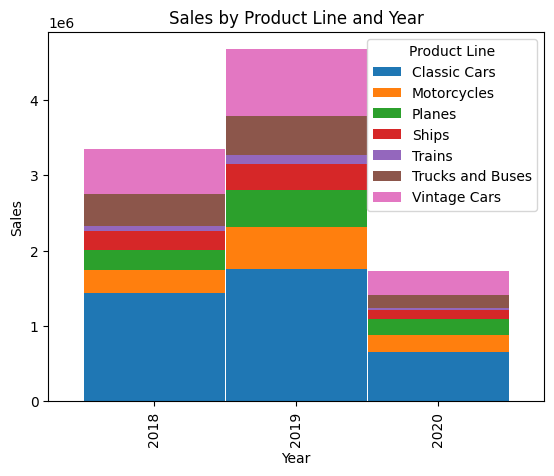

In [229]:
bar_width=0.994
pivot_ProductbYear.plot(kind='bar', stacked=True, width=bar_width)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales by Product Line and Year')
plt.legend(title='Product Line')
plt.show()




In [230]:
sorted_df = Auto_Sales_df.sort_values(by='PRICEEACH', ascending=False)
sorted_df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,ORDERDATE_AMER,MONTH_YEAR,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE,Year
1507,10391,33,252.87,8,8344.71,9/3/2020,9,2020-03-09,Mar-20,1591,Shipped,Vintage Cars,33,S24_1937,North Sydney,2060,Australia,Large,2020
714,10322,50,250.73,6,12536.50,4/11/2019,4,2019-11-04,Nov-19,924,Shipped,Vintage Cars,127,S18_2325,Nashua,62005,USA,Large,2019
25,10112,29,248.59,1,7209.11,24/03/2018,24,2018-03-24,Mar-18,825,Shipped,Classic Cars,214,S10_1949,Lule,S-958 22,Sweden,Large,2018
176,10127,46,245.20,2,11279.20,3/6/2018,3,2018-06-03,Jun-18,905,Shipped,Classic Cars,207,S12_1108,NYC,10022,USA,Large,2018
178,10153,20,245.20,11,4904.00,28/09/2018,28,2018-09-28,Sep-18,790,Shipped,Classic Cars,207,S12_1108,Madrid,28034,Spain,Medium,2018


# Correlation Heat Map

In [231]:
# changing data type for ORDERNUMBER so it's not included in the scatter plots
Auto_Sales_df['ORDERNUMBER'] = Auto_Sales_df['ORDERNUMBER'].astype(object)
# Creating a dataframe for columns with numerical values.
auto_sales_num = Auto_Sales_df.select_dtypes(include='number')




In [232]:
# Verifying that ORDERNUMBER is not included in auto_sales_num
auto_sales_num.dtypes

QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE.1               int64
DAYS_SINCE_LASTORDER      int64
MSRP                      int64
Year                      int32
dtype: object

### Heat Map Visualization using Matplotlib and Seasborn together. 
### As the colors turned from blue to red the correlation is getting stronger.
### e.g. ORDERNUMBER and Year
### note that the diagnal boxes with 1s means is due to same variable being compared to each other.

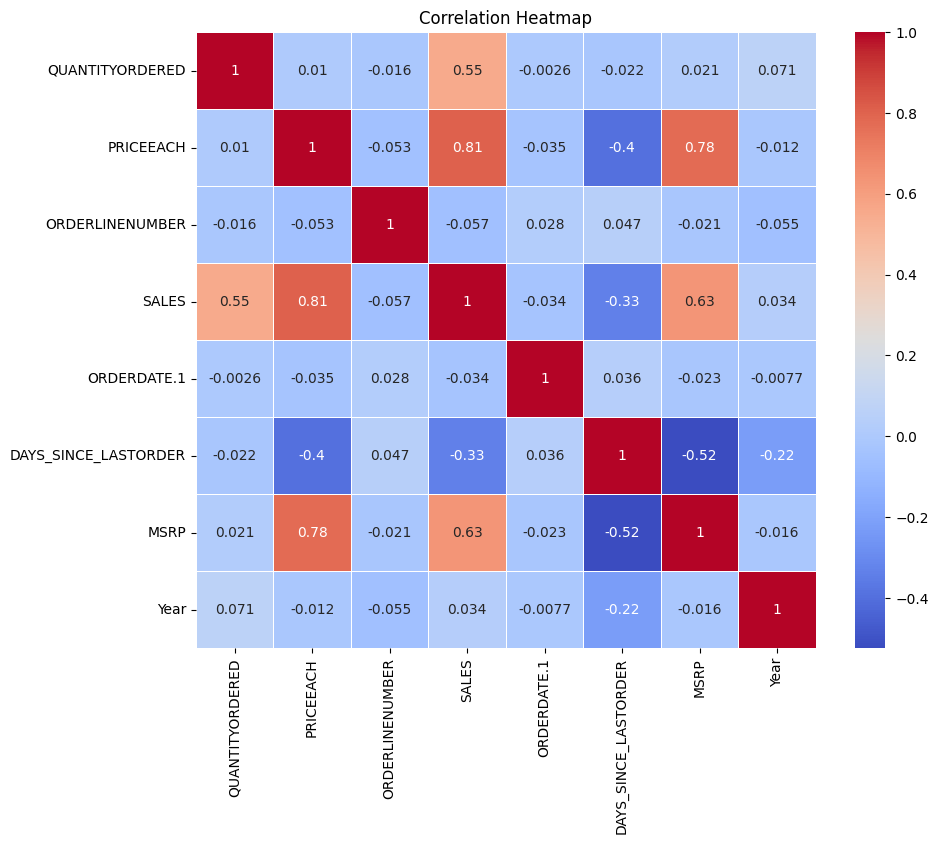

In [233]:


# Calculate the correlation matrix
correlation_matrix = auto_sales_num.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)  # Create heatmap
plt.title('Correlation Heatmap')  # Add a title
plt.show()  # Display the heatmap

### As you could see in the scatterplot below as sales increase so does the price per item. 
### the sales and price per item show positive correlation.

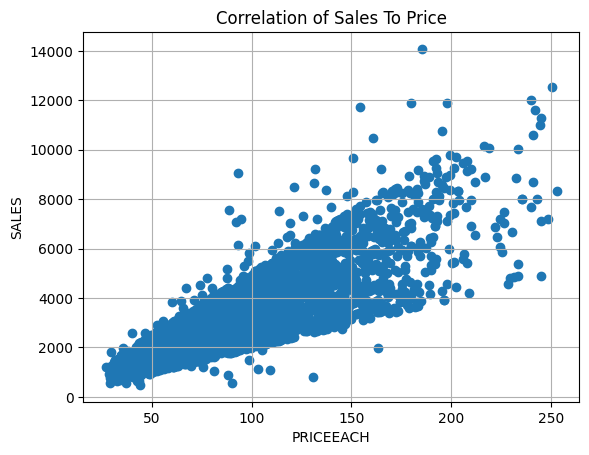

In [234]:
plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['SALES'], cmap='coolwarm')

# Add labels and title
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.title('Correlation of Sales To Price')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### At the end of each year the order # continues on to the next year. 
### Nothing unsual about this scatterplot other then showing you the continuation of the order #s from year to year.

### There is some correlation between increase sales to Order Quantity 
### However, the quantity order around 50 has a very wide sales range. 
### This shows most costumers are buying around quantity of 50.

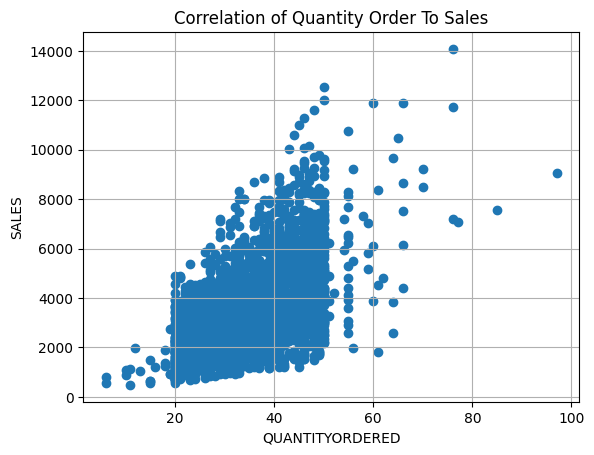

In [235]:
# Create the scatter plot
#plt.scatter(correlation_matrix['ORDERNUMBER'], correlation_matrix['Year'], cmap='coolwarm')
plt.scatter(auto_sales_num['QUANTITYORDERED'], auto_sales_num['SALES'], cmap='coolwarm')

# Add labels and title
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.title('Correlation of Quantity Order To Sales')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### Strong Correlation between the Manfacture Suggested Retail Price and Selling Price suggesting that the items are selling close to Manfacture Suggested Retail Price. Manfacture Suggested Retail Price and Selling Price  are showing positive correlation. 
### The scatter points is an opportunity to adjust the pricing. 


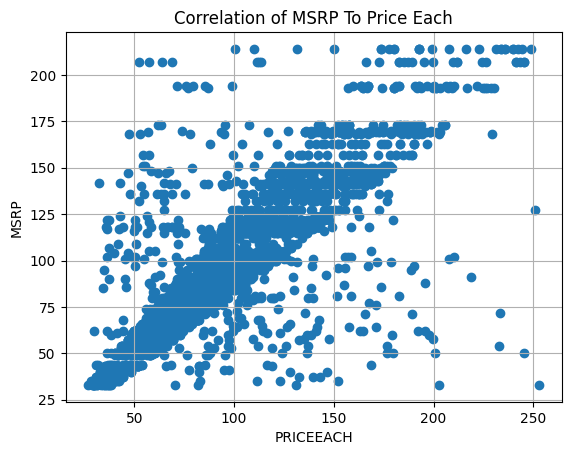

In [236]:
plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['MSRP'], cmap='coolwarm')

# Add labels and title
plt.xlabel('PRICEEACH')
plt.ylabel('MSRP')
plt.title('Correlation of MSRP To Price Each')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### Using seaborn pairplot to explore insights.
### Year and Quantity ordered looks interesting because 2020 has a wide range compared to 2018-2019.
### Order number to price each looks interesting because price each goes from dense to scattered based on order quantity. 

### correlation r values range definitions

##### r = 1: Perfect positive correlation. As one variable increases, the other variable also increases in a perfectly linear fashion.
##### r = -1: Perfect negative correlation. As one variable increases, the other variable decreases in a perfectly linear fashion.

##### 0: no relationship
##### 0.1–0.3: weak relationship
##### 0.3–0.5: moderate relationship
##### 0.5–1.0: strong relationship

##### variable in the pairplot with moderate to high relationship:
##### ORDERNUMBER VS QUANTITYORDERED R - 0.67 Which positive relationship. ORDERNUMBER goes up so does the QUANTITYORDER. 
##### MSRP VS DAYS_SINCE_LAST_ORDER: r = -0.52 which is moderate relationship.  As the MSRP goes higher, the days since last order is shorter. 
##### ORDERNUMBER VS Year: r value 0.9 which is string relationship. This is showing the order numbers in order starting 2018-2020 it's expect to have high correlation as it sequential data by nature. 
##### QUANTITYORDERED VS SALES: r values 0.55 which is a strong relationship. as Quantity order gets high so does the Sales.
##### PRICEEACH VS MSRP: r value 0.78 which is a strong relationship. As the Price for each item goes up so does the MRSP. 
##### PRICEEACH VS SALES: r value 0.81 which is a strong relationship. As the sales goes up so does the price for each item. 
##### SALES VS MRSP: r value 0.63 which is a strong relationship. AS MRSP goes up so does the sales. 
##### DAYS_SINCE_LAST_ORDER VS SALES: r values -0.33, which is a moderate relationship. As the sales goes higher, the days since last order is shorter. 
 



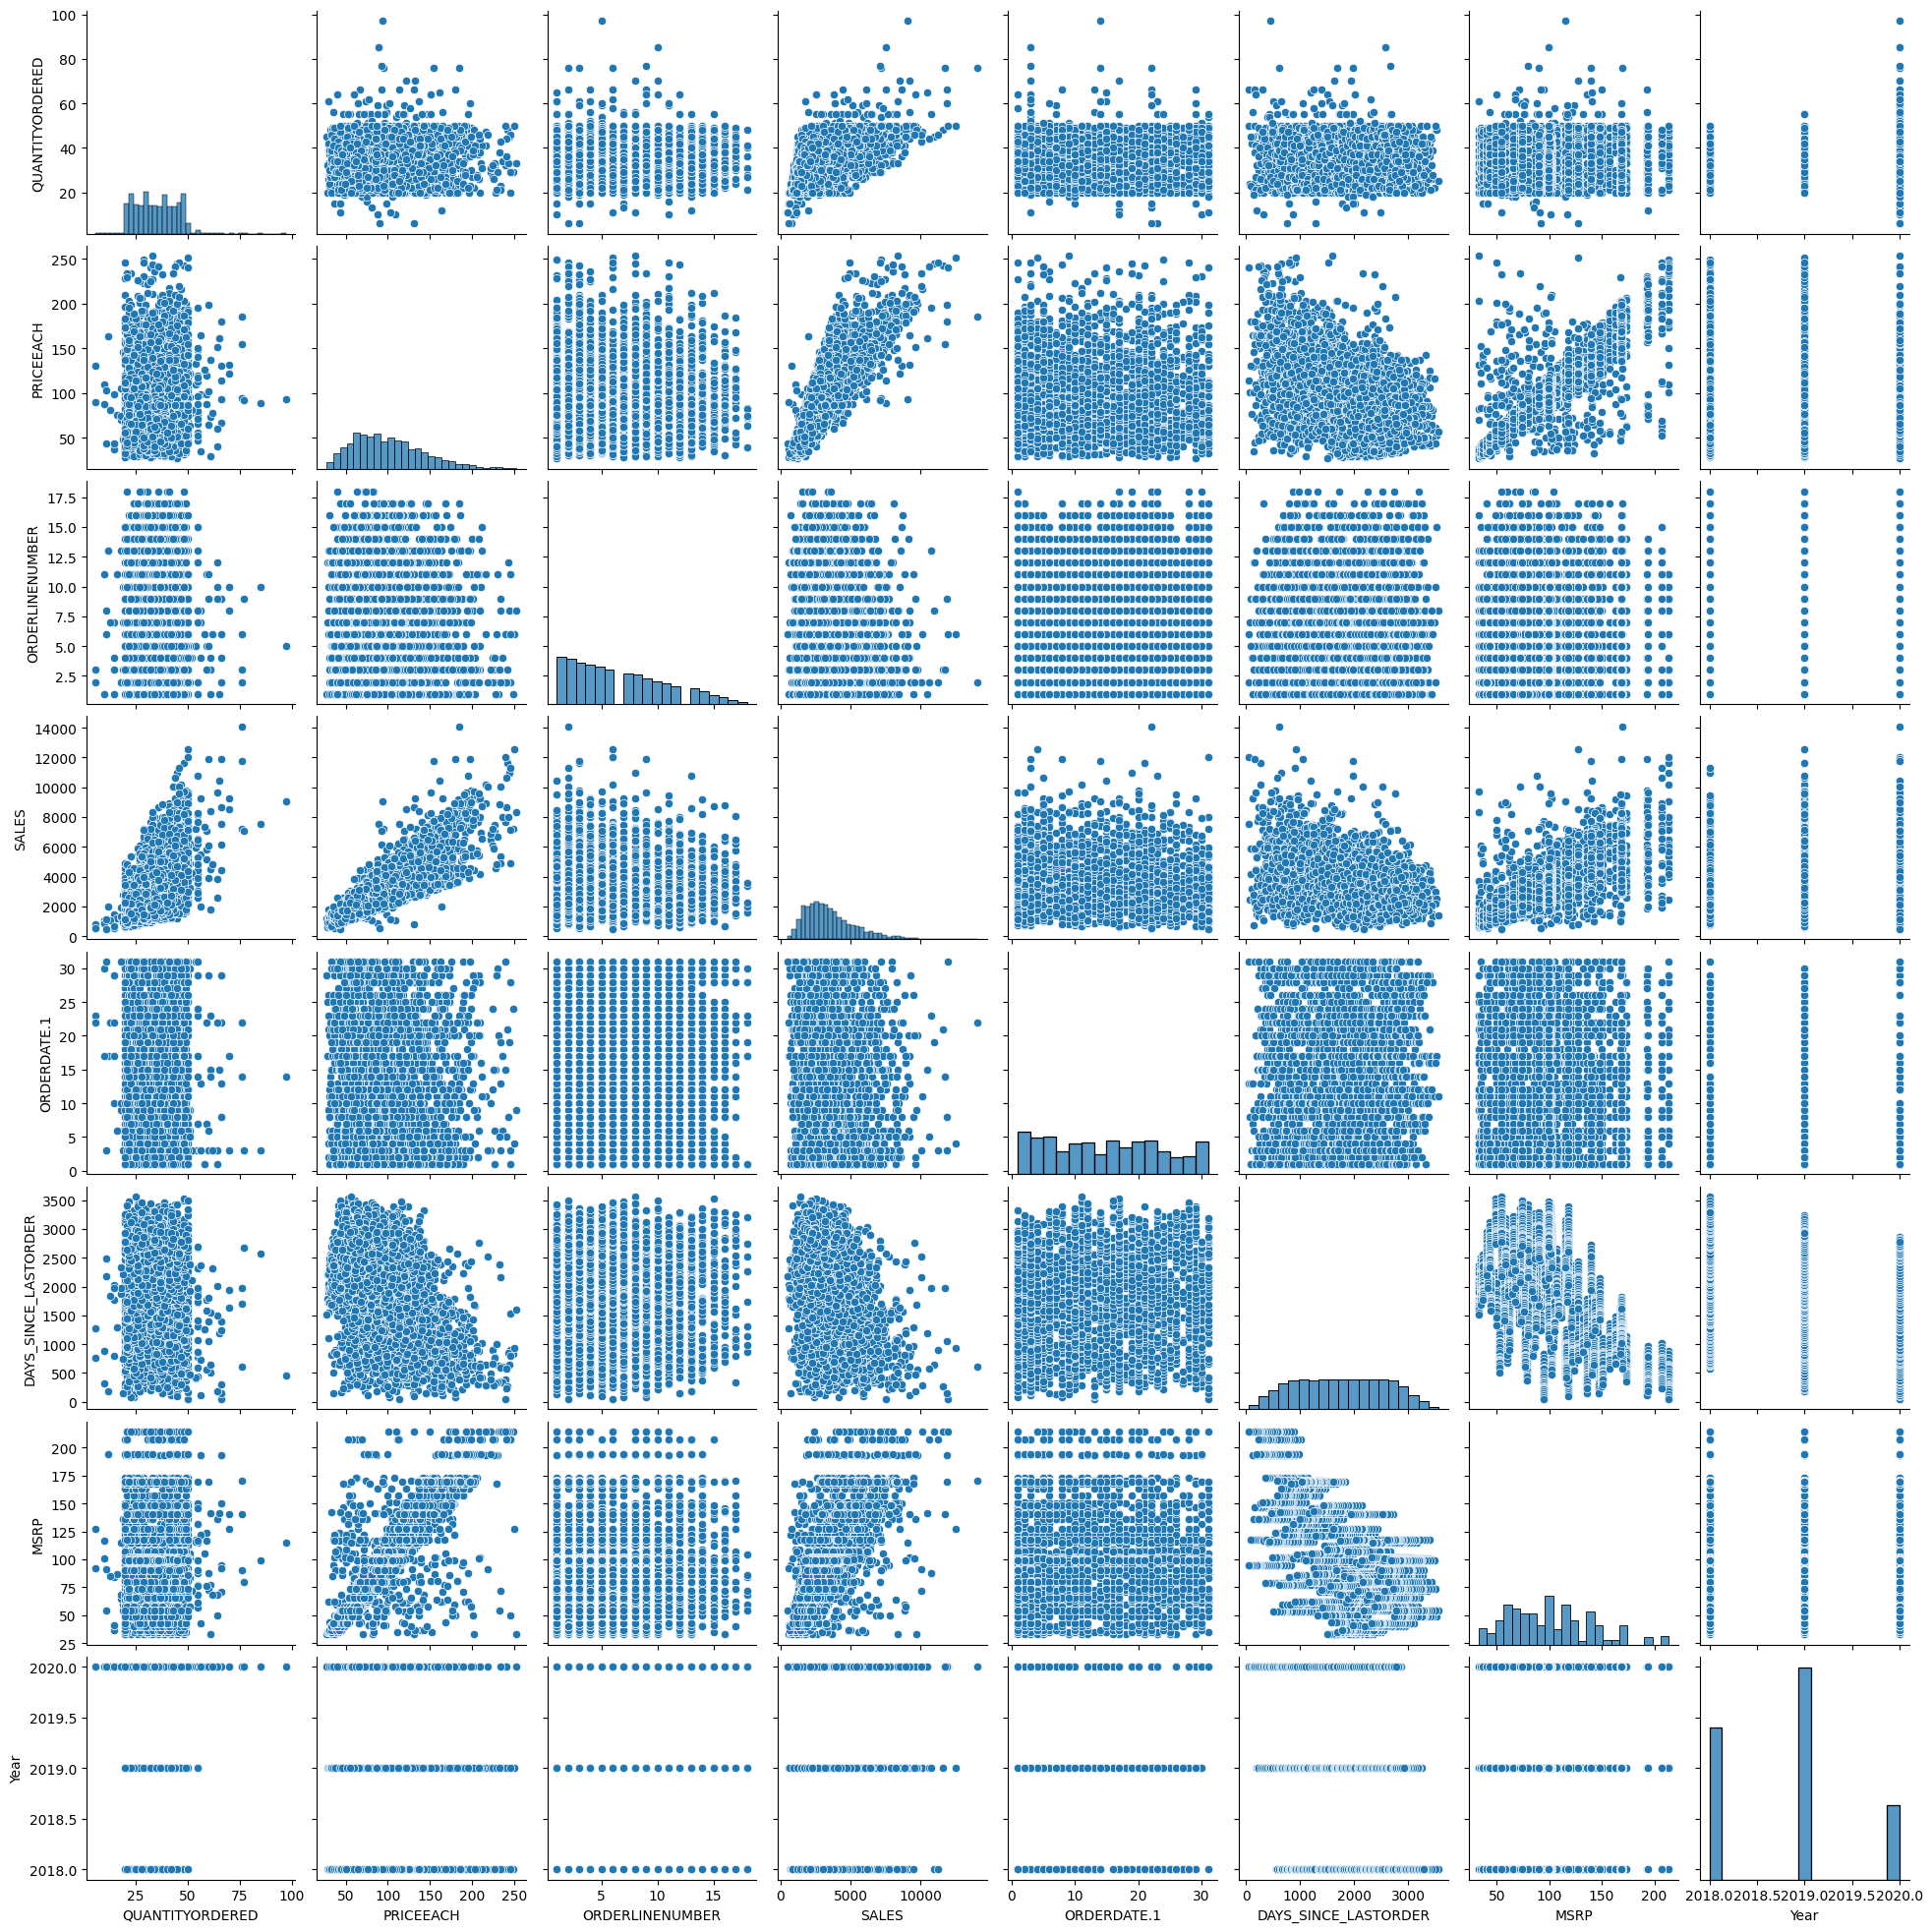

In [237]:
# Create the pair plot
sns.pairplot(auto_sales_num)

# Display the plot
plt.show()

### Using seaborn catplot show relationship between quantity order and year.
### 2018-2019 had little change in quantity order as compared to 2020. 
### 2020 had wider range of quantity orders and also lower min and high max of quantities
### as compared to 2018-2019.

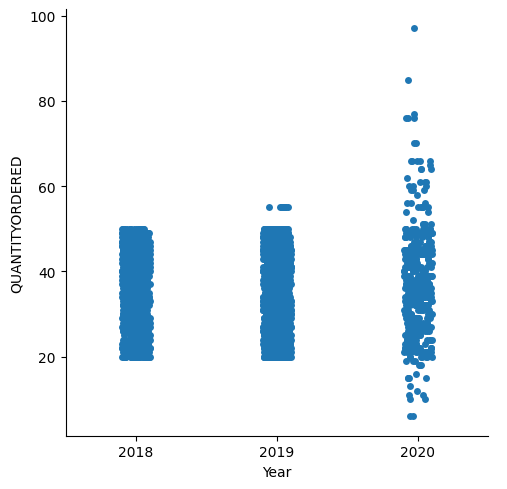

In [238]:
# Create a swarm plot
sns.catplot(x = auto_sales_num['Year'], y = auto_sales_num['QUANTITYORDERED'],data = auto_sales_num)
plt.show()

### Now relationship between Order number and price of each item. 


In [239]:
pivot_City = pd.pivot_table(Auto_Sales_df, index='CITY', columns='PRODUCTLINE', values='SALES', aggfunc='sum')

# Calculate the total sales for each city and add it as a new column
pivot_City['Total Sales'] = pivot_City.sum(axis=1)
pivot_City.head()


PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Total Sales
CITY,,,,,,,,
Aaarhus,79375.64,NaN,NaN,1753.06,7146.23,9588.82,2731.80,100595.55
Allentown,36144.20,33805.30,10235.43,NaN,5351.61,27800.52,8801.08,122138.14
Barcelona,5324.40,10881.75,16179.15,28254.46,NaN,NaN,17772.10,78411.86
Bergamo,5535.25,NaN,67756.64,10754.92,NaN,NaN,53908.91,137955.72
Bergen,60795.84,30524.29,3957.05,NaN,NaN,NaN,16363.10,111640.28


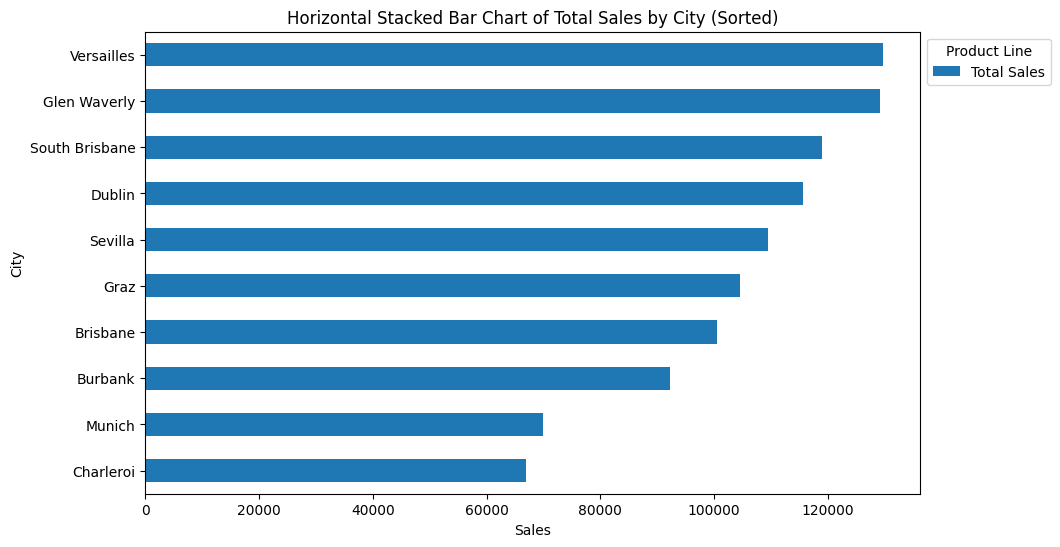

In [240]:
# Create the pivot table
# pivot_City = pd.pivot_table(Auto_Sales_df, index='CITY', columns='PRODUCTLINE', values='SALES', aggfunc='sum')

# Calculate the total sales for each city and add it as a new column
pivot_City['Total Sales'] = pivot_City.sum(axis=1)

# Sort the pivot table by 'Total Sales' column in descending order
pivot_City_sorted = pivot_City.sort_values(by='Total Sales', ascending=True)
# Limit to top 10 cities
pivot_City_top10 = pivot_City_sorted.head(10)
# Plotting the horizontal stacked bar chart with sorted data
pivot_City_top10[['Total Sales']].plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Sales')
plt.ylabel('City')
plt.title('Horizontal Stacked Bar Chart of Total Sales by City (Sorted)')
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))
plt.show()

In [241]:
# # Calculate the correlation matrix
# pivot_City_matrix = pivot_City.corr()

# # Create the heatmap
# plt.figure(figsize=(10, 8))  # Set the figure size
# sns.heatmap(pivot_City_matrix, annot=True, cmap='coolwarm', linewidths=.5)  # Create heatmap
# plt.title('Correlation Heatmap')  # Add a title
# plt.show()  # Display the heatmap

In [242]:
# # Create the pair plot
# sns.pairplot(pivot_City_matrix)

# # Display the plot
# plt.show()

In [243]:
# you can delete after figuring out ow to add the new MARGIN column
auto_sales_num.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE.1,DAYS_SINCE_LASTORDER,MSRP,Year
0,30,95.70,2,2871.00,24,828,95,2018
1,34,81.35,5,2765.90,7,757,95,2018
2,41,94.74,2,3884.34,1,703,95,2018
3,45,83.26,6,3746.70,25,649,95,2018
4,36,96.66,1,3479.76,28,586,95,2018


### NEW COLUMN 'MARGIN'
PRICEEACH - MSRP = MARGIN.

Use auto_sales_num dataset to add this new column and assign a new variable to it and call it auto_sales_margin

In [244]:
# Adding a new column as the sum of column1 and column2
Auto_Sales_df['MARGIN'] = Auto_Sales_df['PRICEEACH'] - Auto_Sales_df['MSRP']

Auto_Sales_df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,ORDERDATE_AMER,MONTH_YEAR,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE,Year,MARGIN
0,10107,30,95.70,2,2871.00,24/02/2018,24,2018-02-24,Feb-18,828,Shipped,Motorcycles,95,S10_1678,NYC,10022,USA,Small,2018,0.70
1,10121,34,81.35,5,2765.90,7/5/2018,7,2018-05-07,May-18,757,Shipped,Motorcycles,95,S10_1678,Reims,51100,France,Small,2018,-13.65
2,10134,41,94.74,2,3884.34,1/7/2018,1,2018-07-01,Jul-18,703,Shipped,Motorcycles,95,S10_1678,Paris,75508,France,Medium,2018,-0.26
3,10145,45,83.26,6,3746.70,25/08/2018,25,2018-08-25,Aug-18,649,Shipped,Motorcycles,95,S10_1678,Pasadena,90003,USA,Medium,2018,-11.74
4,10168,36,96.66,1,3479.76,28/10/2018,28,2018-10-28,Oct-18,586,Shipped,Motorcycles,95,S10_1678,Burlingame,94217,USA,Medium,2018,1.66


In [245]:
# pivot_margin = Auto_Sales_df.pivot_table(Auto_Sales_df, index='PRODUCTLINE', values='SALES', aggfunc='sum')
pivot_margin = Auto_Sales_df.pivot_table(index='PRODUCTLINE', values=['MARGIN', 'SALES'], aggfunc='sum')


In [246]:
pivot_margin.tail()

,MARGIN,SALES
PRODUCTLINE,,
Planes,471.42,969323.42
Ships,508.93,700039.22
Trains,856.37,226243.47
Trucks and Buses,567.77,1111559.19
Vintage Cars,2049.52,1806675.68


### Which city has the largest selling product? Versailles
### Which product line has the highest product margin? Vintage Cars
### What is the forecasting for future sells? I have to use tableau to figure it out. 


# New Question
### Why does 2020 have a wider range of order quantity?
### How does price effect sales? 
### How does MSRP hold up against actual selling price?
### How does quantity order effect sales?

### Hypthothsis: How does does price quantity and year effect sales. 

#### _________________________________________________________________
# Visualiatison using folium for geographical map. 
#### Data transformation of countries in my source file so they match the worldJSON File. 


In [247]:
# Data transformation of countries in my source file so they match the worldJSON File.
auto_sales_geo = Auto_Sales_df
auto_sales_geo['COUNTRY'] = auto_sales_geo['COUNTRY'].replace({'USA' : 'United States of America', 'UK' : 'United Kingdom'})


In [248]:
# Using request module to get data from url.
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()
print(geojson_data['features'][:2])

# Create a base map centered globally.
m = folium.Map(location=[20, 0], zoom_start=2, width='80%', height='80%')

# Add a Choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=auto_sales_geo,
    columns=['COUNTRY', 'SALES'],
    key_on='feature.properties.name',  #  this country key in url json.
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m

[{'type': 'Feature', 'id': 'AFG', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388

#### per the map shows Spain, Finland, Ireland  are the countries with the highest sales
#### United States, Autstralia, France, United Kingdom, Italy are in second for sale. 
#### This comapny doesn't have sales in other countries which are depicated in dark grey. 
#### There aren't any new questions that arise. 

In [249]:
# pivot on unique countries so I can visualy inspect my countries are representated on the map
country_pivot = pd.pivot_table(auto_sales_geo, index='COUNTRY', columns='PRODUCTLINE', values='SALES', aggfunc='sum')
country_pivot

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,193085.54,89968.76,74853.87,4159.76,1681.35,77318.50,189555.32
Austria,101459.47,26047.66,17860.44,9024.73,NaN,20472.75,27197.48
Belgium,20136.96,NaN,5624.79,31708.01,9017.26,NaN,41925.60
Canada,61623.22,4177.49,25510.07,40309.01,NaN,51945.98,40512.79
Denmark,157182.48,NaN,7586.45,38697.26,11476.33,9588.82,21105.81
Finland,153552.24,47866.72,34375.13,29808.44,5117.05,40479.33,18383.00
France,388951.20,226390.31,108155.51,66486.67,27340.80,116982.22,176609.81
Germany,148315.00,7497.50,23001.26,5501.00,5043.42,10178.00,20935.91
Ireland,31688.82,4953.20,11784.36,NaN,3112.60,3983.05,2234.40


In [250]:
# Recreating data frame to include the margin couln that was added to auto sales df.
auto_sales_num = Auto_Sales_df.select_dtypes(include='number')

### Hypthothsis: How does does price quantity and year effect sales. 

#### performed linear regression model train/test
#####  this graph is a visual representation of how well your linear regression model performs in predicting sales based on the PRICEEACH, Year, and QUANTITYORDERED. 
##### The predicted sales are little higher than the ideal fit line. Acutal sales begin to go slightly lower than the Red Regression Line above 8000 (2nd STD). 
##### The model performed well because it follows close to ideal fit line (red regression line). 

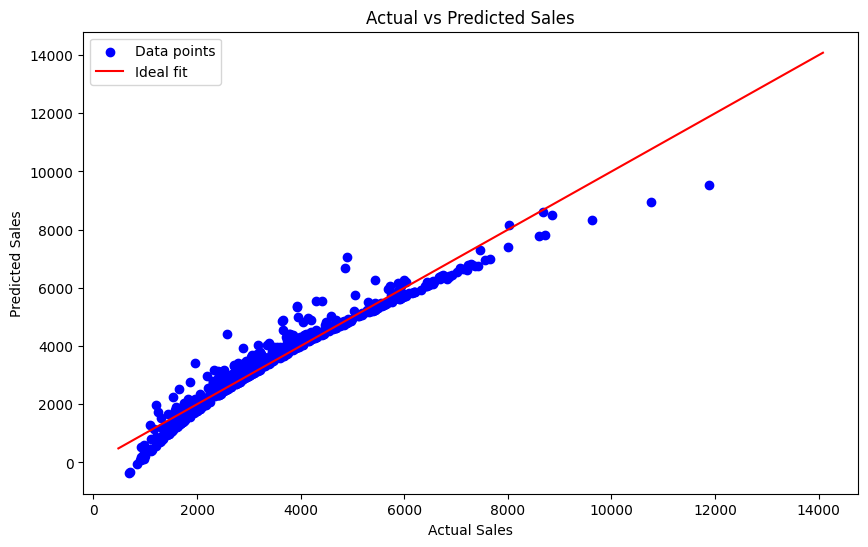

In [251]:
X = auto_sales_num[['PRICEEACH', 'Year', 'QUANTITYORDERED']]  # Independant variables
y = auto_sales_num['SALES']  # Dependant variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Create a scatter plot for actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', label='Ideal fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

## Regression Analysis

In [252]:
regression = LinearRegression()

In [253]:
regression.fit(X_train, y_train)

LinearRegression()

In [254]:
y_predicted = regression.predict(X_test)

In [255]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print('Slope:', regression.coef_)
print("Root Mean Squared Error (RMSE):", rmse)
print('R-squared score:', r2)

Slope: [ 35.28074451  21.54766286 102.79568592]
Root Mean Squared Error (RMSE): 411.489615399621
R-squared score: 0.9444538152144756


In [256]:
# Compere Actual Y vs Predicted Values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted values:
Actual: 2466.7, Predicted: 2438.439147130237
Actual: 2060.37, Predicted: 1851.5249450487463
Actual: 2514.6, Predicted: 2656.314336354124
Actual: 2451.84, Predicted: 2354.892742569391
Actual: 1729.65, Predicted: 1935.9529188061133
Actual: 3988.6, Predicted: 4314.1566876241195
Actual: 2178.54, Predicted: 2012.6292280307316
Actual: 7310.0, Predicted: 6780.161209560443
Actual: 3184.8, Predicted: 3304.6481262863017
Actual: 5941.5, Predicted: 6065.6788984296945
Actual: 3061.0, Predicted: 3683.4392865628397
Actual: 2296.77, Predicted: 2401.132242888496
Actual: 1281.56, Predicted: 713.9116720163147
Actual: 3241.9, Predicted: 3264.3877847125987
Actual: 3245.58, Predicted: 3281.784602274485
Actual: 5554.4, Predicted: 5394.679430777498
Actual: 6749.83, Predicted: 6406.65990259518
Actual: 2969.96, Predicted: 2982.7279245798127
Actual: 6863.92, Predicted: 6362.883112329779
Actual: 2339.92, Predicted: 2783.0079852366907
Actual: 6869.05, Predicted: 6392.993522504621
Actual

 ### RMSE
 RSME is an estimator the average on the sqaure difference between estimated values and true values or how closley the data points are to the red regression line. 
 in our regression anaylsis our model had RSME of 411.49 which is low since our sales range is 3553 to 14082.  the lower the score the higher the accuracy. Our regression model is provding failry accurate sales predictions. RMSE represents about 12% (411.49 / 3553 * 100) of the min sales range.
 (411.49 / 14082 * 100) 3% of the max sales range.
 
### Slope
The slope is a coefficient that tells you how the y variable changes when X changes. A negative slope value indicates a negative relationship and a positive slope indicates a positive relationship. A coefficient of zero would mean that as X rises, y stays the same. A larger value  suggests a stronger impact of the independent variable against the dependent variable.
Our three independant varbiales had a positive reliationship with depedant variable. our QUANTITYORDERED had the strongest impact, since it has slope of 102. 
Slope: [ 35.28074451  21.54766286 102.79568592], (PRICEEACH', 'Year', 'QUANTITYORDERED respectably) 

### R2
The R2 score ranges from 0 to 1, where:
0 indicates that the model does not explain any of the variability of the response data around its mean.
1 indicates that the model perfectly predicts the response data. The R2 Score is 0.9444538152144756 is really close to 1.
The Predictive sales and Actaul sales alighn closely with each other on the linear regression line around 1715-5391 range (within 1st STD). It starts to waver out with the outliers above a 2nd STD of 7229. Removing outliers would yield an even stronger accuracy. 


__________________________________________________________

### Cluster Analysis Usin K-Means (For Unsupervised Machine Learning)



In [257]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i)for i in num_cl]

In [258]:
kmean = KMeans(n_clusters=3)

In [259]:
# Assuming auto_sales_num is a list
auto_sales_num_array = np.array(auto_sales_num)

# Fit the model to the data
kmean.fit(auto_sales_num_array)

KMeans(n_clusters=3)

In [260]:
auto_sales_num

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE.1,DAYS_SINCE_LASTORDER,MSRP,Year,MARGIN
0,30,95.70,2,2871.00,24,828,95,2018,0.70
1,34,81.35,5,2765.90,7,757,95,2018,-13.65
2,41,94.74,2,3884.34,1,703,95,2018,-0.26
3,45,83.26,6,3746.70,25,649,95,2018,-11.74
4,36,96.66,1,3479.76,28,586,95,2018,1.66
...,...,...,...,...,...,...,...,...,...
2742,20,112.22,15,2244.40,2,2924,54,2019,58.22
2743,29,137.19,1,3978.51,31,2865,54,2020,83.19
2744,43,125.99,4,5417.57,1,2836,54,2020,71.99
2745,34,62.24,1,2116.16,28,2810,54,2020,8.24


#### Elbo Technique 
Elbow technique shows you the breaking point, or “elbow,” at which adding more clusters won’t help better explain the variances in your data.
 Downward elbow curve suggests that increasing the number of clusters does not significantly reduce the Within-Cluster Sum of Squares (WCSS). This can be an indicator of overfitting.  Visually in the Elbo graph below, the breaking point is 3. 


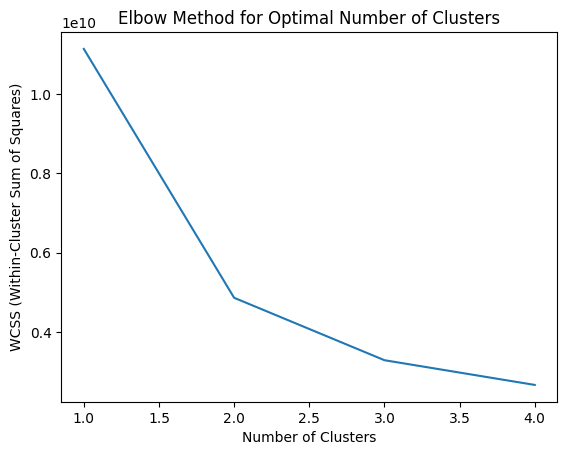

In [261]:
wcss = []  # Initialize list to store WCSS values

# Try different numbers of clusters (e.g., from 1 to 10) and calculate WCSS
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(auto_sales_num_array)
    wcss.append(kmeans.inertia_)  # inertia_ contains the WCSS value

# Plot the elbow curve
plt.plot(range(1, 5), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

added in columns called Cluster into the auto_sales_num

In [262]:
cluster_labels = kmean.fit_predict(auto_sales_num_array)

# Assign cluster labels to a new 'Cluster' column in the DataFrame
auto_sales_num['Cluster'] = cluster_labels

# Display the DataFrame with the new 'Cluster' column
auto_sales_num.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE.1,DAYS_SINCE_LASTORDER,MSRP,Year,MARGIN,Cluster
0,30,95.70,2,2871.00,24,828,95,2018,0.70,1
1,34,81.35,5,2765.90,7,757,95,2018,-13.65,1
2,41,94.74,2,3884.34,1,703,95,2018,-0.26,0
3,45,83.26,6,3746.70,25,649,95,2018,-11.74,0
4,36,96.66,1,3479.76,28,586,95,2018,1.66,0


In [263]:
auto_sales_num['Cluster'].value_counts()

Cluster
1    1385
0    1002
2     360
Name: count, dtype: int64

The scatter plot allows you to visualize any apparent relationship between PRICEEACH and SALES.
Clusters can highlight trends, such as whether higher-priced products tend to generate higher sales or if there are certain price ranges that correspond to specific sales performance.

Cluster 1 (Blue):
Price vs. Sales Relationship: Products in this cluster tend to have lower prices and lower sales. This cluster includes products that are priced lower but may not sell as frequently or in large quantities.
Potential Description: This cluster may represent luxury or premium products that have lower price points but lower sales volumes due to their exclusivity or niche market appeal. But this group is lower than purple and yellow. 

Cluster 2 (Yellow):
Price vs. Sales Relationship: Products in this cluster generally have higher prices and generating the moist sales out of three clusters.

The Purple Cluster may represent higher-priced items that sell moderately well. It could indicate a segment of the market that values quality and is willing to pay more, but the sales volume is not as high as lower-priced segments.

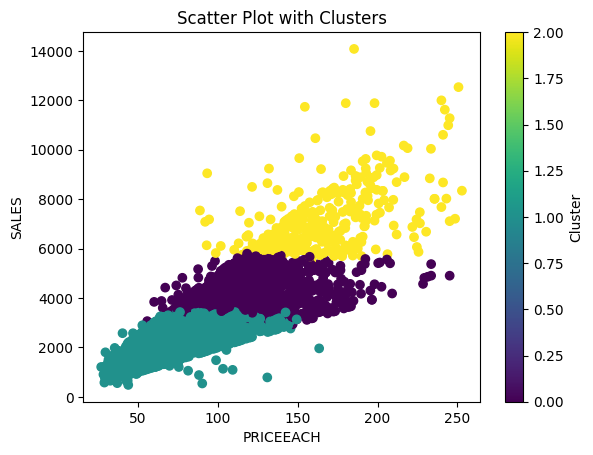

In [264]:
plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['SALES'], c=auto_sales_num['Cluster'], cmap='viridis')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.title('Scatter Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot allows you to visualize any apparent relationship between QUANTITYORDERED and Year.
Clusters can highlight trends, such as whether certain years have higher order quantities or if specific quantities were more common in certain years.

Cluster 1 (Blue):
Quantity Ordered and Year Relationship: Products in this cluster tend to have higher quantities ordered across different years.
Potential Description: This cluster may represent product models or types that consistently have high demand and sales volumes over time, regardless of the specific year.

Cluster 2 (Yellow):
Quantity Ordered and Year Relationship: Products in this cluster generally have lower quantities ordered compared to Cluster 1, with some fluctuations across different years.
Potential Description: This cluster may represent product models or types that experience varying levels of demand and sales volumes over time, possibly influenced by factors such as market trends, model popularity, or economic conditions.

the Purple Cluster may represent products that are ordered in higher quantities in recent years. It could indicate a segment of the market that has seen increased demand recently and is characterized by higher volume orders.

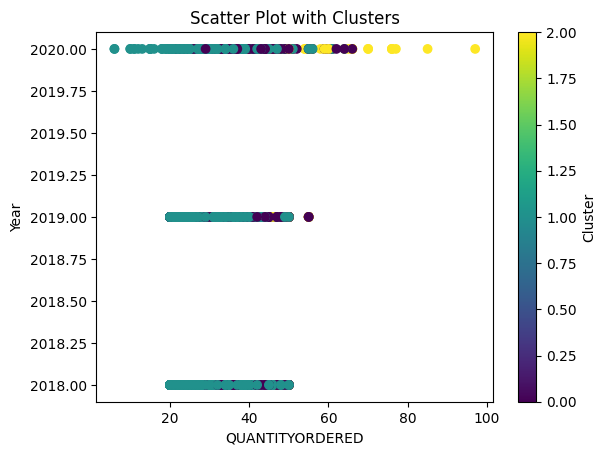

In [265]:
plt.scatter(auto_sales_num['QUANTITYORDERED'], auto_sales_num['Year'], c=auto_sales_num['Cluster'], cmap='viridis')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('Year')
plt.title('Scatter Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot allows you to visualize any apparent relationship between DAYS_SINCE_LASTORDER and MSRP.
Clusters can highlight trends, such as whether higher MSRP products tend to have longer gaps between orders or if lower MSRP products are ordered more frequently.

Cluster 1 (Blue):
Days Since Last Order and MSRP Relationship: Products in this cluster tend to have shorter days since the last order and higher MSRP.
Potential Description: This cluster may represent newer or recently released product models that command higher prices, resulting in shorter intervals between orders.

Cluster 2 (Yellow):
Days Since Last Order and MSRP Relationship: Products in this cluster generally have longer days since the last order and lower MSRP compared to Cluster 1.
Potential Description: This cluster may represent older or less expensive product models that are ordered less frequently, leading to longer intervals between orders.

The Purple Cluster may represent products with higher MSRP values that are ordered less frequently. It could indicate a segment of the market that deals with high-value items that are not purchased very often.

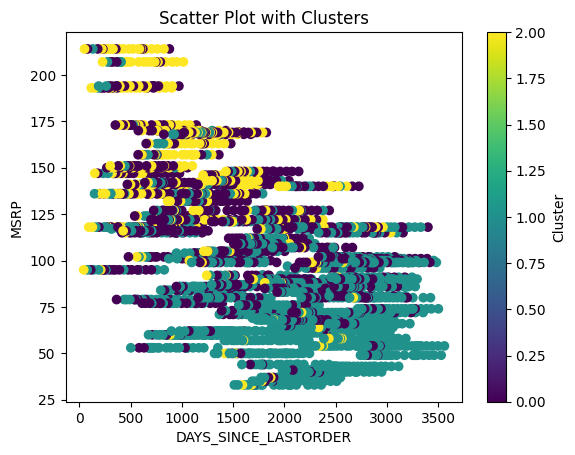

In [266]:
plt.scatter(auto_sales_num['DAYS_SINCE_LASTORDER'], auto_sales_num['MSRP'], c=auto_sales_num['Cluster'], cmap='viridis')
plt.xlabel('DAYS_SINCE_LASTORDER')
plt.ylabel('MSRP')
plt.title('Scatter Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot allows you to visualize any apparent relationship between MARGIN and SALES.

Cluster 1 (Blue):
Margin vs. Sales Relationship: Products in this cluster tend to have Higher margins but Higher sales volumes.
Potential Description: This cluster may represent higher-end or premium products that have lower profit margins but may not sell in large quantities due to their premium pricing or niche market appeal. However the other two Clusters arez higher than in margin in sales, more pronouced. 

Cluster 2 (Yellow):
Margin vs. Sales Relationship: Products in this cluster generally have Higher margins but higher sales volumes compared to Cluster 1.
Potential Description: This cluster may represent mainstream or popular products that have higher profit margins but sell in larger quantities due to their affordability or broader customer base appeal.

The Purple Cluster may represent products with higher profit margins that do not necessarily translate into high sales volumes. It could indicate a segment of the market that focuses on high-margin. 

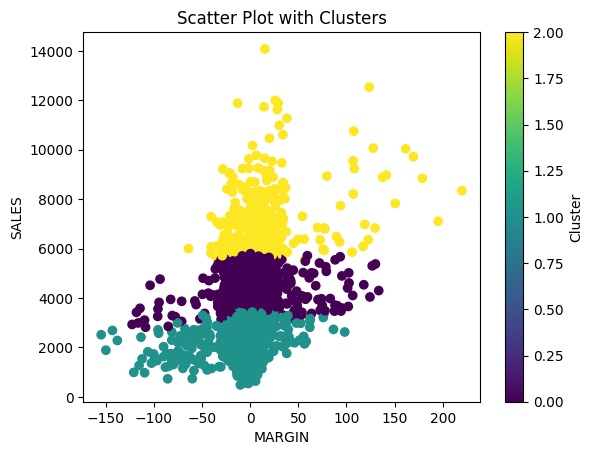

In [267]:
plt.scatter(auto_sales_num['MARGIN'], auto_sales_num['SALES'], c=auto_sales_num['Cluster'], cmap='viridis')
plt.xlabel('MARGIN')
plt.ylabel('SALES')
plt.title('Scatter Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()

# GROUP()
The output will include descriptive statistics for each feature within each cluster, helping you understand the characteristics of each cluster.
Using groupby('Cluster').describe() to get a summary of descriptive statistics (count, mean, std, min, 25%, 50%, 75%, and max) for each cluster.

In [268]:
# Add the cluster labels to the DataFrame
auto_sales_num['Cluster'] = cluster_labels

# Compute descriptive statistics for each cluster
cluster_stats = auto_sales_num.groupby('Cluster').describe()

# Print the descriptive statistics for each cluster
print(cluster_stats)

# Optional: Compute specific statistics
cluster_means = auto_sales_num.groupby('Cluster').mean()
print(cluster_means)

cluster_medians = auto_sales_num.groupby('Cluster').median()
print(cluster_medians)

cluster_std = auto_sales_num.groupby('Cluster').std()
print(cluster_std)

        QUANTITYORDERED                                                     \
                  count       mean       std   min   25%   50%   75%   max   
Cluster                                                                      
0                1002.0  37.035928  8.656891  20.0  30.0  38.0  44.0  66.0   
1                1385.0  31.228159  8.637778   6.0  24.0  30.0  37.0  64.0   
2                 360.0  44.630556  8.542188  26.0  40.0  45.0  48.0  97.0   

        PRICEEACH              ...    Year          MARGIN             \
            count        mean  ...     75%     max   count       mean   
Cluster                        ...                                      
0          1002.0  118.298553  ...  2019.0  2020.0  1002.0   2.396357   
1          1385.0   72.719646  ...  2019.0  2020.0  1385.0  -5.165552   
2           360.0  162.408222  ...  2019.0  2020.0   360.0  16.311000   

                                                            
               std     min     

#  Results could be useful for in future steps of an analytics pipeline.
Customer Segmentation
Use Case: Customer Retention: Identifying which clusters have the highest lifetime value can help in devising strategies to retain these customers.
Future Steps: Analyze demographic and behavioral data associated with each cluster to understand customer profiles better.

Product Portfolio Management
Use Case: Inventory Management: Understanding which clusters of products generate the most sales and profit can help in optimizing inventory levels.
Future Steps: Conduct a deeper analysis of product features within each cluster to understand what drives sales and margins.